In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda


In [2]:
# Get dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [13]:
# Convert to dataloader
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [14]:
# neural network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 500),
            nn.ReLU(),
            nn.Linear(500, 300),
            nn.ReLU(),
            nn.Linear(300, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
# Get model 
model = NeuralNetwork()
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=300, bias=True)
    (3): ReLU()
    (4): Linear(in_features=300, out_features=10, bias=True)
  )
)

In [21]:
# Hyperparameters - parameters you can tune to control the optimization process 
learning_rate = 1e-2
batch_size = 64
epochs = 5

In [22]:
# Loss function 
loss_fn = nn.CrossEntropyLoss()

In [23]:
# Optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [24]:
# Optimization loop (2 parts, training loop, validation/testing loop)
'''
    3 steps 
    1. zero out optimizer gradients
    2. calculate gradients
    3. apply graidents 
'''
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [25]:
# Train 
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.830300  [    0/60000]
loss: 0.885985  [ 6400/60000]
loss: 0.619712  [12800/60000]
loss: 0.801165  [19200/60000]
loss: 0.694469  [25600/60000]
loss: 0.663644  [32000/60000]
loss: 0.753399  [38400/60000]
loss: 0.700865  [44800/60000]
loss: 0.722367  [51200/60000]
loss: 0.668257  [57600/60000]
Test Error: 
 Accuracy: 77.5%, Avg loss: 0.646582 

Epoch 2
-------------------------------
loss: 0.575094  [    0/60000]
loss: 0.680057  [ 6400/60000]
loss: 0.452524  [12800/60000]
loss: 0.674809  [19200/60000]
loss: 0.596775  [25600/60000]
loss: 0.576685  [32000/60000]
loss: 0.617936  [38400/60000]
loss: 0.650599  [44800/60000]
loss: 0.681401  [51200/60000]
loss: 0.569000  [57600/60000]
Test Error: 
 Accuracy: 79.7%, Avg loss: 0.574739 

Epoch 3
-------------------------------
loss: 0.467890  [    0/60000]
loss: 0.586234  [ 6400/60000]
loss: 0.386501  [12800/60000]
loss: 0.610342  [19200/60000]
loss: 0.536103  [25600/60000]
loss: 0.534613  [32000/600

In [27]:
# Label map 
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

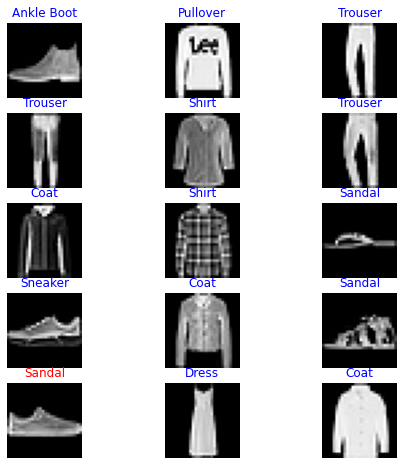

Accuracy 93.33333333333333%


In [43]:
# evaluation 
import matplotlib.pyplot as plt
model.eval() 

# Graph 
total_correct = 0 
count = 0
max_count = 15
with torch.no_grad():
    figure = plt.figure(figsize=(8, 8))
    row, col = (5, 3)
    for batch_img, batch_label in test_dataloader: 
        for img,label in zip(batch_img, batch_label):
            count += 1
            pred = model(img) 
            figure.add_subplot(row, col, count)
            plt.imshow(img.squeeze(), cmap="gray")
            plt.axis("off")
            correct = (pred.argmax(1) == label).type(torch.float).sum().item() 
            total_correct += correct 
            if(correct == 1):
                plt.title(labels_map[pred.argmax().item()], color="blue")
            else:
                plt.title(labels_map[pred.argmax().item()], color="red")
            if(count == max_count):
                break 
        if(count == max_count):
            break 
    plt.show() 
    
# accuracy 
print(f"Accuracy {100.0*(total_correct/max_count)}%")